<a href="https://www.kaggle.com/code/gregoriusbayuaji/hr-analysis-promotion-rate?scriptVersionId=201283985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting 
from collections import Counter
from sklearn.model_selection import train_test_split

# For Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
import category_encoders as ce

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Introduction

Human Resources (HR) is a precious and strategic asset to determine whether the company is healthy or not it looks from the assets. Human Resources Development should be planned and continued if it is the company's need in the future. One of the most important processes that often happens at the company is a promotion for employees. With the promotion, employees will work well and be responsible.

# Problem

Problems arise when increasingly fierce employee competition actually makes it difficult for the company to determine whether employees who have been promoted for promotion are worthy or not, because sometimes the parties concerned to promote employees and HRD do not follow existing procedures. 

On the other hand, the company also has data about piling up employee promotions, but the company is still not able to manage this data optimally. Even the company itself has not realized that the pile of data can be used as useful information. 

Now companies can no longer process their data manually, given the large number of employees and the rapid development of technology. For analysis to be more effective, HRD needs systematic assistance to process and store data.

# Goals


1) Knowing what the criteria and standard to promote the employees

2) Creating a model that can predict which employees that should be promoted

# Data Collecting

Data collection comes from 

In [2]:
# Collect train and test data
train = pd.read_csv('../input/hranalysis/train.csv')
test = pd.read_csv('../input/hranalysis/test.csv')

In [3]:
# Show the head of train data
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
# Show the head of test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Print the test and train data size
print("Train Data size (rows, collums):", train.shape)
print("Test Data Size (rows, collums):", test.shape)

Train Data size (rows, collums): (54808, 14)
Test Data Size (rows, collums): (23490, 13)


# Data Describing

According to the info, we find out that the variables of the data are:
- employee_id: Employee's unique ID
- department: Employee's department
- region: Employee's region (Not in order)
- education: Employee's education level
- gender: Employee's Gender
- recruitment_channel: Employee's Recruitment Channel
- no_of_trainings: Number of employee's skill training (techical skill, soft skill, and other skill)
- age: Employee's Age
- previous_year_rating: Employee's previous year score
- length_of_service: Employee's length of service (year)
- KPIs_met >80%: Does the employee meet the KPI criteria above 80%?
- awards_won?: Does the employee won the awards last year?
- avg_training_score: Average employee's training evaluation score
- is_promoted: Is the employee worth to be promoted?

Gender variables have abbrevation as follows:
- f: female
- m: male

Variables' of "KPIs_meet >80%", "awards_won?", and "is_promoted" are as follows:
- 0: No
- 1: Yes

In [6]:
# Print the info of each dataframe
print('TRAIN DATA')
train.info()
print('')
print('-------------------------------------------------')
print('')
print('TEST DATA')
test.info()

TRAIN DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB

-

From the dataframe info at the table above, we can see that there are some null data or missing values at test and train data. We need to do data manipulation by checking the data duplication and check the null data or missing values.

### Check the Data Duplication

In [7]:
# Check the duplicated data of both train and test
dupl_train = train[train.duplicated()]
dupl_test = test[test.duplicated()]

# Print the duplicated data number
print('Train Data Duplicate Number: ', dupl_train.shape)
print('---------------------------')
print('Test Data Duplicate Number: ', dupl_test.shape)

Train Data Duplicate Number:  (0, 14)
---------------------------
Test Data Duplicate Number:  (0, 13)


The result shows that here are no duplicate data inside dataframe on each rows and columns

# Missing values

## 1. From Train set

In [8]:
# Find the null value numbers at the train dataframe
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
# Check the null value at 'previous_year_rating' column
# When 'lengh_of_service' column is 1
train[(train['length_of_service'] == 1)]['previous_year_rating']

10      NaN
23      NaN
29      NaN
56      NaN
58      NaN
         ..
54703   NaN
54734   NaN
54746   NaN
54773   NaN
54801   NaN
Name: previous_year_rating, Length: 4547, dtype: float64

In [10]:
# Fill the values of 'previous_year_rating' column with '0'
# When the 'length_of_service' column is '1'
train.loc[train['length_of_service'] == 1, 'previous_year_rating'] = 0

We fill the null 'previous_year_rating' with 0 because we can see that all of the null data has 'length_of_service' with 1, so we can argue that the employees are the new employee, haven't there for a year yet.

In [11]:
# Delete all other null values in train dataframe
train = train.dropna()

# Show the train shape
train.shape

(52399, 14)

In [12]:
# Check the null values at train dataframe
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 2. From Test Set

In [13]:
# Check the null values at test dataframe
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
# Check the values at the 'previous_year_rating' column
# When the 'length_of_service' column is '1'
test[(test['length_of_service'] == 1)]['previous_year_rating']

0        NaN
21       NaN
32       NaN
39       NaN
47       NaN
        ... 
23445    NaN
23469    1.0
23479    NaN
23485    3.0
23488    NaN
Name: previous_year_rating, Length: 1992, dtype: float64

In [15]:
# Fill the values of 'previous_year_rating' column with '0'
# When the 'length_of_service' column is '1'
test.loc[test['length_of_service'] == 1, 'previous_year_rating'] = 0

In [16]:
# Dropping records with null values
test = test.dropna()

# Check the shape of test dataframe without null values
test.shape

(22456, 13)

# Exploratory Data Analysis (EDA) & Data Visualization

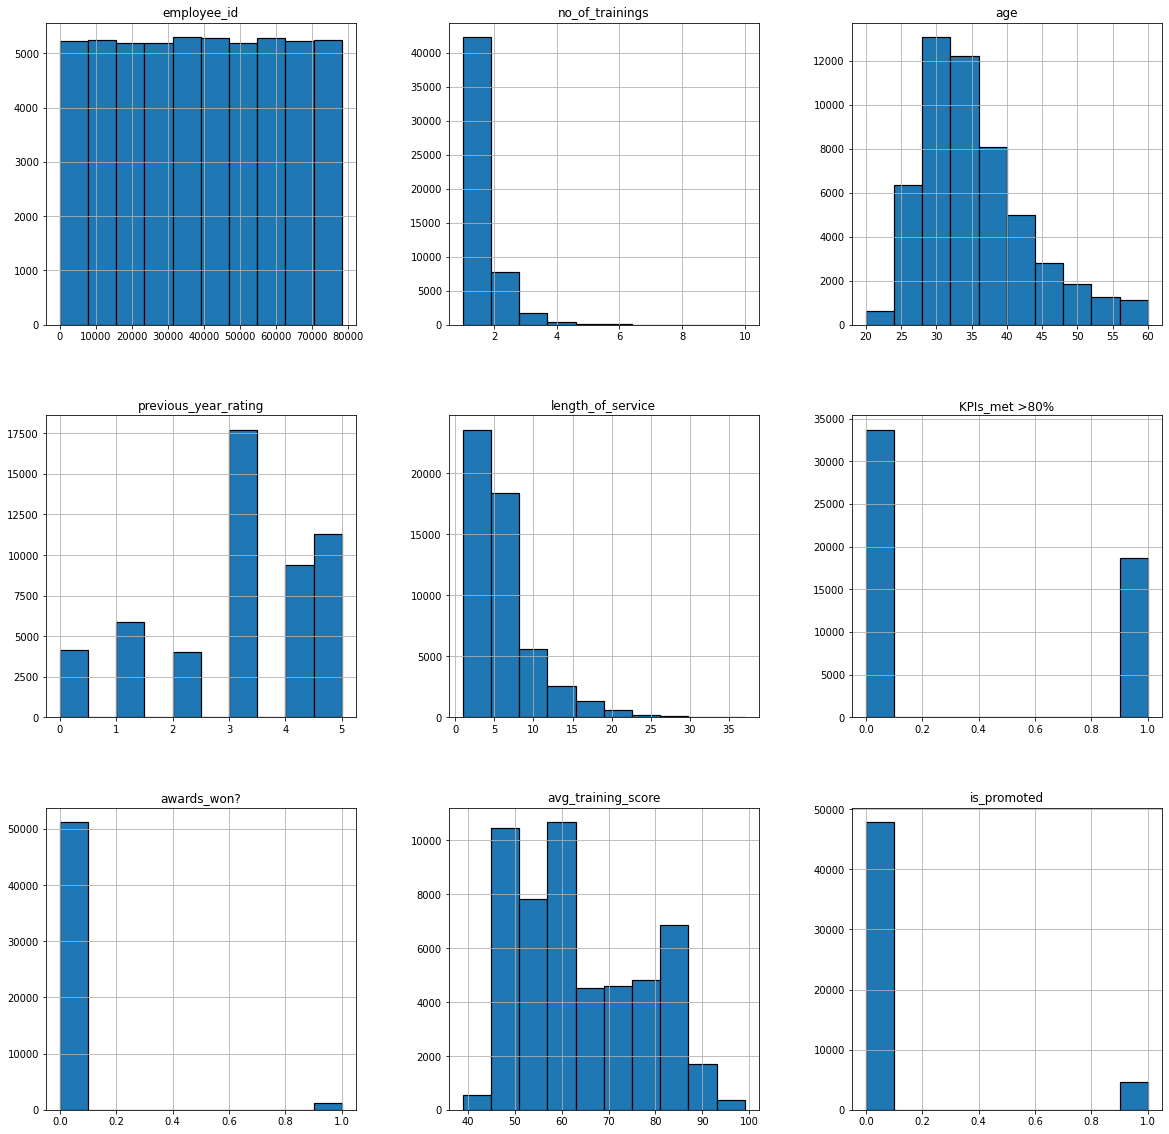

In [17]:
# Create the histogram of each column
train.hist(edgecolor='black',linewidth=1.2, figsize=(20,20));

## 1. Based on Department

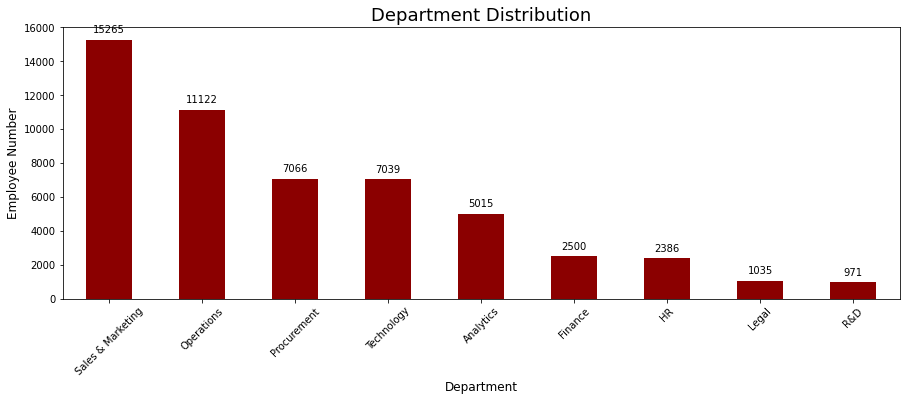

In [18]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = train['department'].value_counts(dropna=False).plot.bar(color=['darkred'])

# Annotating each bar with the count
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Labelling the bar chart
plt.title('Department Distribution', size=18)
plt.xlabel('Department', size=12)
plt.xticks(rotation=45)
plt.ylabel('Employee Number', size=12)

# Naming the chart
plt.show()

In [19]:
a = train.groupby(['department','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculation of the promotion rate based on the department
a['%'] = ((a[1] / (a[0] + a[1])) * 100).round(2)

# Promotion rate result
a

is_promoted,0,1,%
department,,,
Analytics,4529,486,9.69
Finance,2294,206,8.24
HR,2251,135,5.66
Legal,982,53,5.12
Operations,10106,1016,9.14
Procurement,6379,687,9.72
R&D,904,67,6.90
Sales & Marketing,14129,1136,7.44
Technology,6279,760,10.80


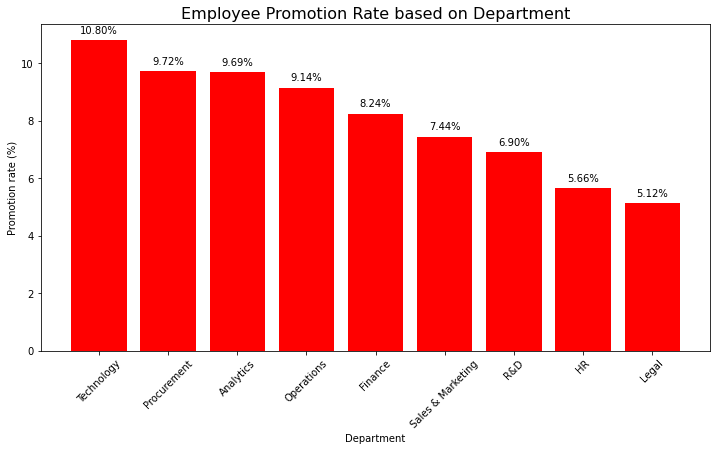

In [20]:
# Create the barchart based on promotion rate
# Sizing its picture
plt.figure(figsize=(12,6))

# Input the promotion rate data into the bar chart
a = a.sort_values('%',ascending=False)
bars = plt.bar(a.index, a['%'], color='red')

# Annotating each bar with the promotion percentage
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}%', 
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Naming the barchart
plt.title('Employee Promotion Rate based on Department', size=16)

# Labelling the barchart
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Promotion rate (%)')

plt.show()

From the graphic above we can see that not all departments have the same promotion rate. Technology and Analytics department are two of the highest with around 10% of promotion rate, while HR & Legal department are two of the lowest with around 5% of promotion rate

## 2. Based on Region

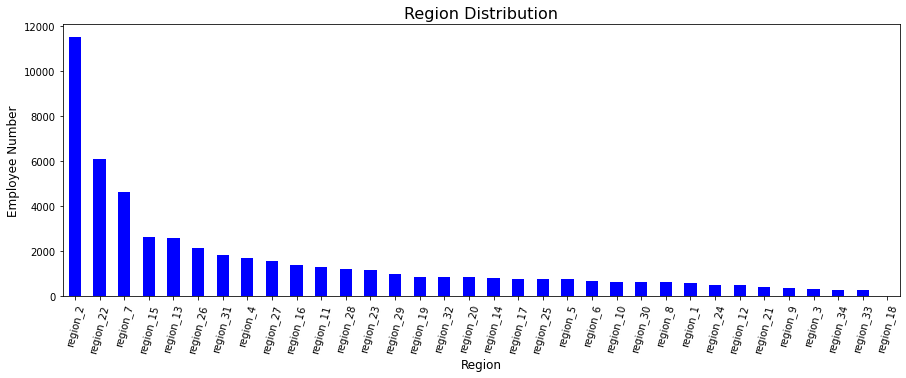

In [21]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = train['region'].value_counts(dropna=False).plot.bar(color=['blue'])

# Naming the barchart
plt.title('Region Distribution', size=16)

# Labelling the barchart
plt.xlabel('Region', size=12)
plt.xticks(rotation=75)
plt.ylabel('Employee Number', size=12)

plt.show()

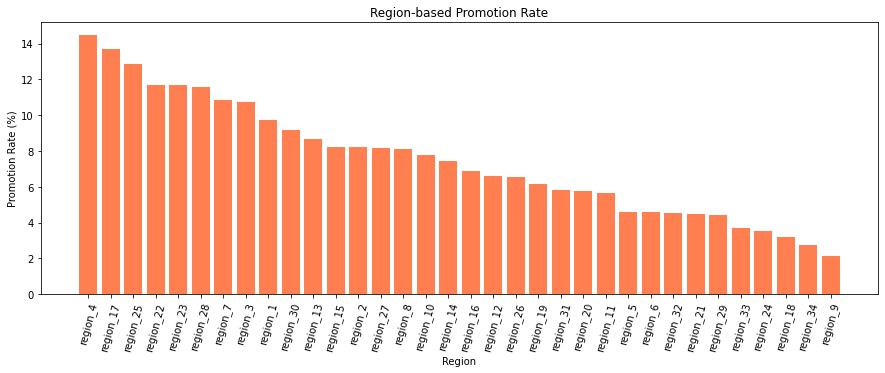

In [22]:
# Promotion rate equation of each region
y = train.groupby(['region', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculation of promotion rate
y['%'] = (y[1] / (y[0] + y[1])) * 100

# Sorting by promotion rate to get insights easily
y = y.sort_values('%', ascending=False)  

# Plotting as a bar chart
plt.figure(figsize=(15,5))
plt.bar(y.index, y['%'], color='coral')

# Naming the bar chart
plt.title('Region-based Promotion Rate')

# Labelling the bar chart
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.ylabel('Promotion Rate (%)')
plt.show()

Based on the graphics above, we can see that the descending value promotion rate is not the same as the descending value of the employees at each region. That means region has less correlation to determine the promotion status of the employee

## 3. Based on Education

In [23]:
# Count the values of 'education' columns
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

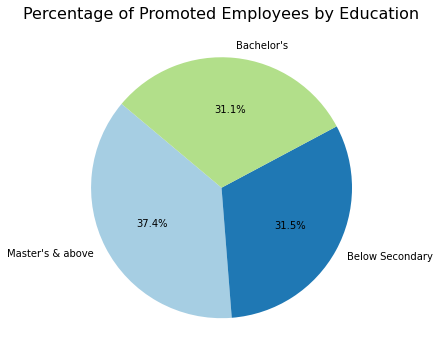

In [24]:
# Create the promotion rate of the employee based on education
# Group the dataframe based on education
b = train.groupby(['education','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Create the equation
b['%'] = b[1] / (b[0] + b[1]) * 100

# Sort the result
b = b.sort_values('%',ascending=False)

# Create and naming the piechart
plt.figure(figsize=(12,6))
plt.pie(b['%'], labels=b.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Promoted Employees by Education', size=16)

# Show the chart
plt.show()

From the graphic above we can see that all of the promoted employees has nearly the same promotion rate number (around 30%), even though employees with master degree has higher promotion rate, but still don't reach 40%.

## 4. Based on Gender

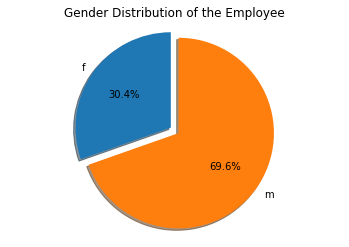

In [25]:
# Labelling the chart based on the dataframe
labels = 'f','m'

# Input the data into the chart
sizes = list(train.groupby('gender')['gender'].count())

# Create a shadowing effect
explode = (0.1,0)

# Plotting the chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

# Naming the chart
plt.title("Gender Distribution of the Employee")
plt.show()

## 5. Based on Recruitment Channel

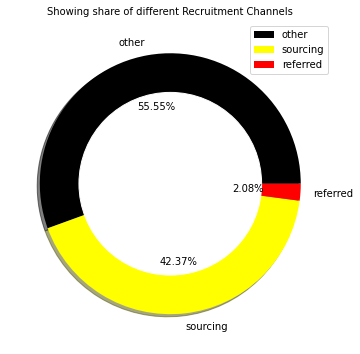

In [26]:
# Data for the pie chart
size = [30446, 23220, 1142]
labels = ["other", "sourcing", "referred"]
color = ["black", "yellow", "red"]

# Create a circle for the center to turn the pie chart into a donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white') 

# Set the figure size
plt.rcParams['figure.figsize'] = (6, 6)

# Plot the pie chart
plt.pie(size, labels=labels, colors=color, shadow=True, autopct='%.2f%%')

# Add the white circle in the center
p = plt.gcf()
p.gca().add_artist(my_circle)

# Add title and show the legend
plt.title('Showing share of different Recruitment Channels', fontsize=10)
plt.legend()
plt.show()

## 6. Based on Number of Trainings

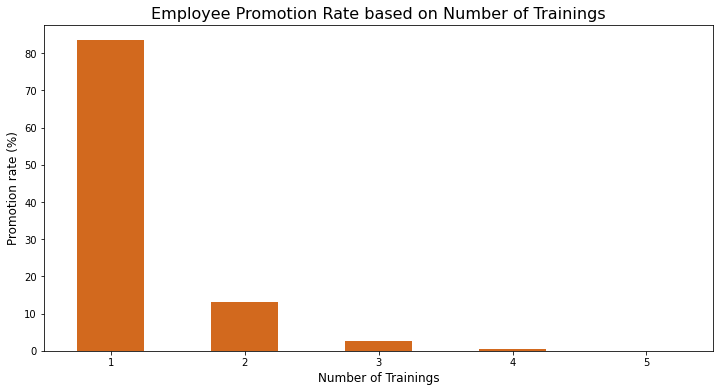

In [27]:
# Grouped the data based on the no_of_trainings column
b = train.groupby(['no_of_trainings','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculate the promotion rate
b['%'] = (b[1] / (b[1].sum())) * 100

# Filter the number to just 1 to 5
b = b.loc[1:5]

# Plot the bar chart and input the data
plt.figure(figsize=(12,6))
b['%'].plot.bar(color='chocolate')

# Add the title and label
plt.title('Employee Promotion Rate based on Number of Trainings', size = 16)
plt.xlabel('Number of Trainings', size=12)
plt.xticks(rotation=0, size=10)
plt.ylabel('Promotion rate (%)', size=12)

plt.show()

## 7. Based on Age

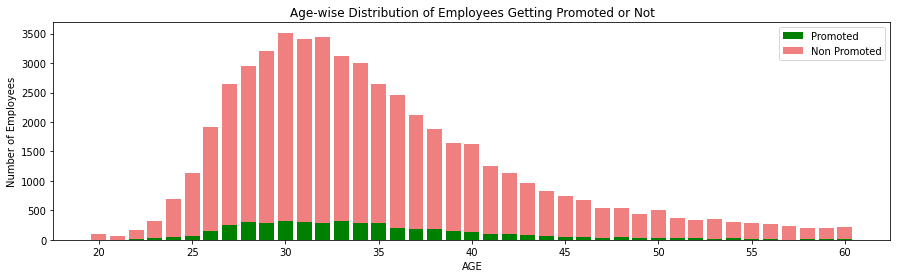

In [28]:
# Group the data of age distribution based on the promotion rate
y = train.groupby(['age', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['total'] = y.sum(axis=1)

# Create the bar chart 
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(y.index, y[1], label='Promoted', color='green')
ax.bar(y.index, y[0], bottom=y[1], label='Non Promoted', color='lightcoral')

# Add the label, legend, and the title
ax.set_xlabel('AGE')
ax.set_ylabel('Number of Employees')
ax.set_title('Age-wise Distribution of Employees Getting Promoted or Not')
ax.legend()

plt.show()

## 8. Based on Previous Year Rating

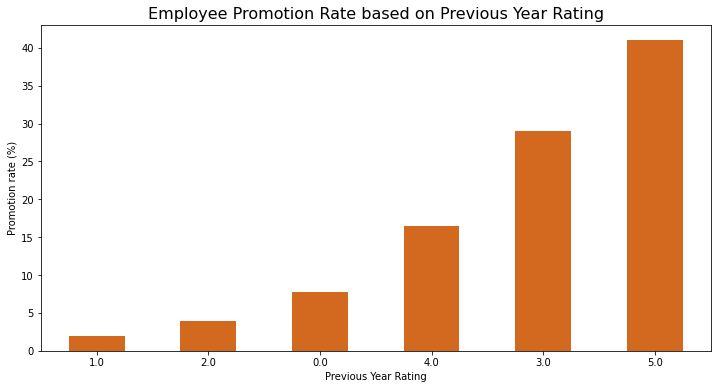

In [29]:
# Group the previous_year_rating values based on the promoted status
b = train.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculate the promotion rate
b['%'] = (b[1] / (b[1].sum())) * 100
b = b.sort_values('%',ascending=True)

# Plot the barchart
plt.figure(figsize=(12,6))
b['%'].plot.bar(color='chocolate')

# Add the title and the label
plt.title('Employee Promotion Rate based on Previous Year Rating', size=16)
plt.xlabel('Previous Year Rating')
plt.xticks(rotation = 0)
plt.ylabel('Promotion rate (%)')

plt.show()

## 9. Based on Length of Service

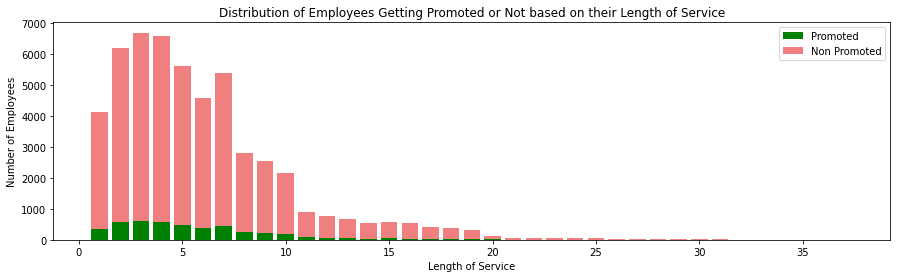

In [30]:
y = train.groupby(['length_of_service', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['total'] = y.sum(axis=1)


fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(y.index, y[1], label='Promoted', color='green')
ax.bar(y.index, y[0], bottom=y[1], label='Non Promoted', color='lightcoral')
ax.set_xlabel('Length of Service')
ax.set_ylabel('Number of Employees')
ax.set_title('Distribution of Employees Getting Promoted or Not based on their Length of Service')
ax.legend()

plt.show()

## 10. Based on KPI's Met > 80

In [31]:
# Group the KPI score with the promotion status of the employee
z = train.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculate the promotion result
z['%'] = ((z[1] / (z[0] + z[1])) * 100).round(2)

# Show the promotion result
z

is_promoted,0,1,%
KPIs_met >80%,,,
0,32333,1370,4.06
1,15520,3176,16.99


Text(0, 0.5, 'Promotion rate (%)')

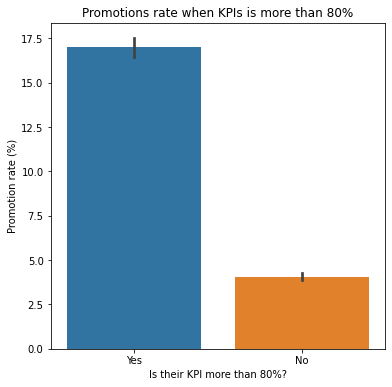

In [32]:
# Mapping binary values to 'No' and 'Yes'
train['KPI_label'] = train['KPIs_met >80%'].map({0: 'No', 1: 'Yes'})

# Create the barplot using the mapped labels
sns.barplot(x=train['KPI_label'], y=(train['is_promoted'] * 100))

# Add title and label to the barplot
plt.title("Promotions rate when KPIs is more than 80%")
plt.xlabel("Is their KPI more than 80%?")
plt.ylabel("Promotion rate (%)")

In [33]:
# Drop the mapping label column after the bar showed
train.drop('KPI_label', axis=1, inplace=True)

In [34]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


## 11. Based on Awards Won

In [35]:
# Group the awards winning employee with the promotion status
x = train.groupby(['awards_won?','is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Calculate the promotion result
x['%'] = (x[1] / (x[0] + x[1]) * 100).round(2)

# Show the table
x

is_promoted,0,1,%
awards_won?,,,
0,47178,4007,7.83
1,675,539,44.40


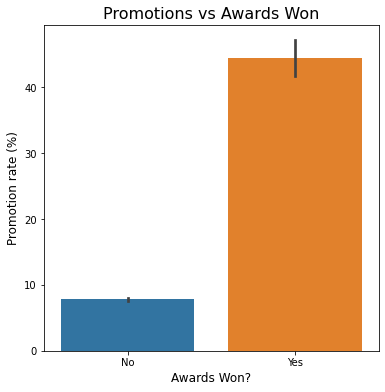

In [36]:
# Mapping binary values to 'No' and 'Yes'
train['awards_won_label'] = train['awards_won?'].map({0: 'No', 1: 'Yes'})

# Create the barplot using the mapped labels
sns.barplot(x=train['awards_won_label'], y=(train['is_promoted'] * 100))

# Add the title and labels
plt.title("Promotions vs Awards Won", size=16)
plt.ylabel("Promotion rate (%)", size=12)
plt.xlabel('Awards Won?', size=12)

plt.show()

In [37]:
# Drop the mapping label column after the bar showed
train.drop('awards_won_label', axis=1, inplace=True)

## 12. Based on Average Training Score

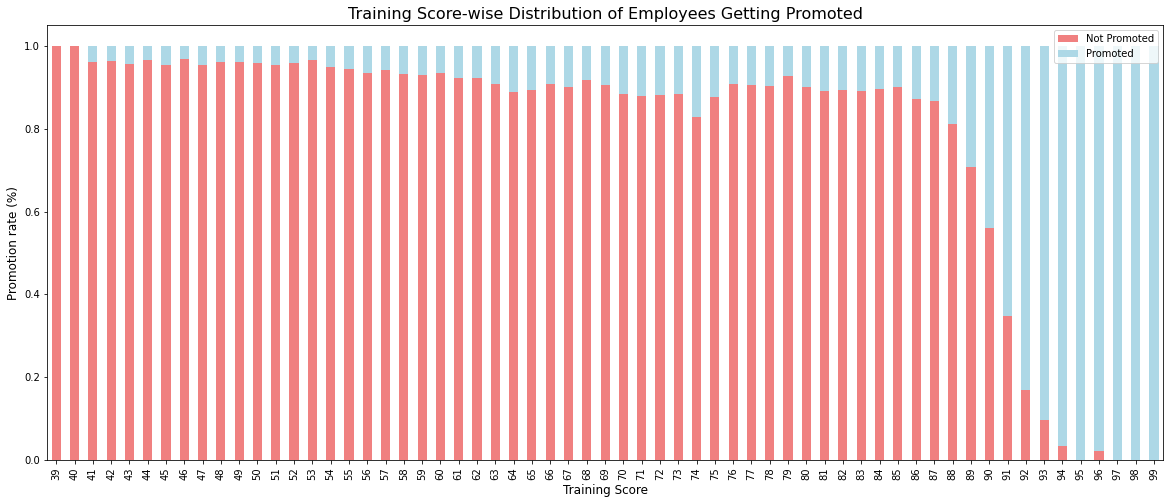

In [38]:
# Grouping data by average training score and promotion status
y = train.groupby(['avg_training_score', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)

# Normalizing the data to get the percentage of promotions
y1 = y.div(y.sum(1).astype('float'), axis=0)

# Rename the columns for a more descriptive legend (0 -> 'Not Promoted', 1 -> 'Promoted')
y1.columns = ['Not Promoted', 'Promoted']

# Plot the stacked bar chart
y1.plot(kind='bar', stacked=True, figsize=(20, 8), color=['lightcoral', 'lightblue'])

# Add labels and title
plt.xlabel('Training Score', size=12)
plt.ylabel('Promotion rate (%)', size=12)
plt.title("Training Score-wise Distribution of Employees Getting Promoted", size=16)

# Display the plot
plt.show()

<AxesSubplot:>

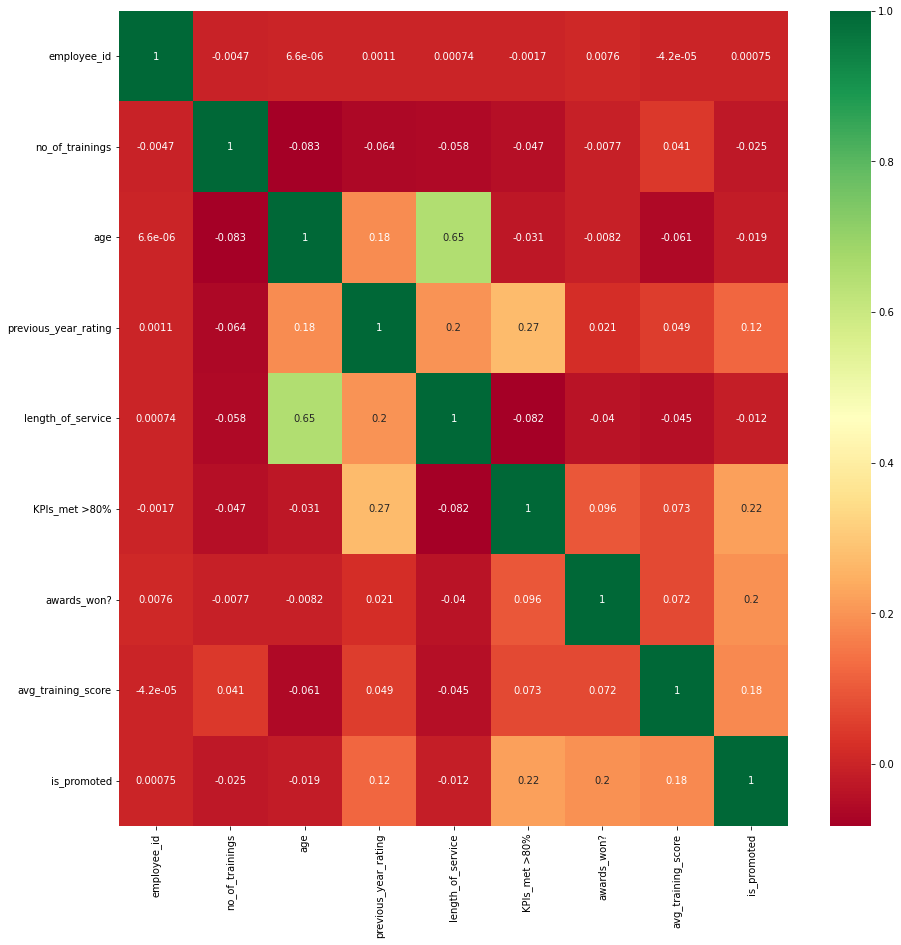

In [39]:
# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":10})

From the EDA result of each variables and the correlation matrix, we can see that only 4 variables that can effect the employee promotion criteria. Those variables are previous year rating, KPI, awards, and average training score. But even though, if we compared it to other variables, they give effect to the promotion criteria, the effect is only around 20%

# Data Splitting

Data Splitting is used to ensure data that used to train and test the model are based on the same condition, so the result will be same.

In [40]:
#Splitting dataset into train set and validation set
train, val = train_test_split(train, test_size = 0.30, random_state = 1,
                             stratify = train.is_promoted)

In [41]:
print("AFTER SPLITTING \n")
print("Train set shape: \t",train.shape)
print("Validation set shape: \t", val.shape)
print("\nTarget Variable in Original Data:\t", Counter(train.is_promoted))
print("Target Variable in Train Data:   \t",Counter(train.is_promoted))
print("Target Variable in Validation Data:\t", Counter(val.is_promoted))

AFTER SPLITTING 

Train set shape: 	 (36679, 14)
Validation set shape: 	 (15720, 14)

Target Variable in Original Data:	 Counter({0: 33497, 1: 3182})
Target Variable in Train Data:   	 Counter({0: 33497, 1: 3182})
Target Variable in Validation Data:	 Counter({0: 14356, 1: 1364})


In [42]:
#Further splitting Validation set in Val1 and Val2 set for better analysis
val1,val2 = train_test_split(val,test_size = 0.50, random_state = 1,
                             stratify = val.is_promoted)

In [43]:
print("AFTER FURTHER SPLITTING \n")
print("Validation set shape : \t",val.shape)
print("Val1 set shape : \t",val1.shape)
print("Val2 set shape : \t",val2.shape)


print("\nTarget Variable in Validation Data: \t",Counter(val.is_promoted))
print("Target Variable in Val1 Data :  \t",Counter(val1.is_promoted))
print("Target Variable in Val2 Data :  \t",Counter(val2.is_promoted))

AFTER FURTHER SPLITTING 

Validation set shape : 	 (15720, 14)
Val1 set shape : 	 (7860, 14)
Val2 set shape : 	 (7860, 14)

Target Variable in Validation Data: 	 Counter({0: 14356, 1: 1364})
Target Variable in Val1 Data :  	 Counter({0: 7178, 1: 682})
Target Variable in Val2 Data :  	 Counter({0: 7178, 1: 682})


There is no class ratio imbalance after splitting so stratified splitting has worked successfully

In [44]:
# Drop the 'is_promoted' column from x_train
x_train = train.drop('is_promoted', axis=1)

# Move the column to y_train
y_train = train.is_promoted

print("train: ", train.shape)
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)

train:  (36679, 14)
x_train:  (36679, 13)
y_train:  (36679,)


In [45]:
# Drop the 'is_promoted' column from x_val1
x_val1 = val1.drop('is_promoted', axis=1)

# Move the column to y_val1
y_val1 = val1.is_promoted

print("val1: ", val1.shape)
print("x_val1: ", x_val1.shape)
print("y_val1: ", y_val1.shape)

val1:  (7860, 14)
x_val1:  (7860, 13)
y_val1:  (7860,)


In [46]:
# Drop the 'is_promoted' column from x_val2
x_val2=val2.drop('is_promoted',axis=1)

# Move the column to y_val2
y_val2 = val2.is_promoted

print("val2 :",val2.shape)
print("x_val2 :",x_val2.shape)
print("y_val2 :",y_val2.shape)

val2 : (7860, 14)
x_val2 : (7860, 13)
y_val2 : (7860,)


In [47]:
# Set the x_test dataframe
x_test = test
print("x_test :",x_test.shape)

x_test : (22456, 13)


# Feature Engineering

In [48]:
# Describe the train dataframe without validation dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36679 entries, 770 to 31254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           36679 non-null  int64  
 1   department            36679 non-null  object 
 2   region                36679 non-null  object 
 3   education             36679 non-null  object 
 4   gender                36679 non-null  object 
 5   recruitment_channel   36679 non-null  object 
 6   no_of_trainings       36679 non-null  int64  
 7   age                   36679 non-null  int64  
 8   previous_year_rating  36679 non-null  float64
 9   length_of_service     36679 non-null  int64  
 10  KPIs_met >80%         36679 non-null  int64  
 11  awards_won?           36679 non-null  int64  
 12  avg_training_score    36679 non-null  int64  
 13  is_promoted           36679 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.2+ MB


Based on the table above, we can see that there are 5 variables with 'object' data type. They're department, region, education, gender, and recruitment channel.

Based on the variances, we'll do One Hot Encoding for Gender, Education, and Recruitment Channel variable, and do Target Encoding for Department and Region Variable

### 1. Gender

For the gender column, I'll use One-hot encoding method, that will convert the 'gender' column into 2 more binary columns

In [49]:
#Creating dummy variables for the 'gender' column on all dataframes
gender1 = pd.get_dummies(x_train['gender'])
gender2 = pd.get_dummies(x_val1['gender'])
gender3 = pd.get_dummies(x_val2['gender'])
gender4 = pd.get_dummies(x_test['gender'])

# Adding these new dummy columns to the dataframes
x_train = x_train.join(gender1)
x_val1 = x_val1.join(gender2)
x_val2 = x_val2.join(gender3)
x_test = x_test.join(gender4)

In [50]:
# Drop the 'gender' and 'f' column on every dataframes
x_train.drop(['gender', 'f'], axis = 1, inplace = True)
x_val1.drop(['gender', 'f'], axis = 1, inplace = True)
x_val2.drop(['gender', 'f'], axis = 1, inplace = True)
x_test.drop(['gender', 'f'], axis = 1, inplace = True)

In [51]:
# Rename 'm' column, because it will has the same values as 'f' column
x_train.rename(columns={'m': 'gender (1_=_m, 0_=_f)'}, inplace = True)
x_val1.rename(columns={'m': 'gender (1_=_m, 0_=_f)'}, inplace = True)
x_val2.rename(columns={'m': 'gender (1_=_m, 0_=_f)'}, inplace = True)
x_test.rename(columns={'m': 'gender (1_=_m, 0_=_f)'}, inplace = True)

In [52]:
# Show the result
x_train.head()

,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1_=_m, 0_=_f)"
770,26952,Analytics,region_13,Master's & above,other,1,34,2.0,6,0,0,86,1
5419,68849,Sales & Marketing,region_22,Bachelor's,sourcing,1,36,3.0,5,0,0,47,0
36583,49809,Operations,region_7,Bachelor's,other,1,32,3.0,7,0,0,59,0
51379,8384,HR,region_20,Master's & above,other,1,35,3.0,5,0,0,51,0
23322,35781,HR,region_13,Bachelor's,other,1,39,3.0,11,0,0,49,1


### 2. Education

Because there are only 3 values at 'education' column, I'll also use One-hot Encoding

In [53]:
# Creating dummy variables for the 'gender' column on all dataframes
edu1=pd.get_dummies(x_train['education'])
edu2=pd.get_dummies(x_val1['education'])
edu3=pd.get_dummies(x_val2['education'])
edu4=pd.get_dummies(x_test['education'])

# Adding the dummy column to the dataframes
x_train=x_train.join(edu1)
x_val1=x_val1.join(edu2)
x_val2=x_val2.join(edu3)
x_test=x_test.join(edu4)

In [54]:
# Drop the 'education' column on all dataframes
x_train.drop('education',axis=1,inplace=True)
x_val1.drop('education',axis=1,inplace=True)
x_val2.drop('education',axis=1,inplace=True)
x_test.drop('education',axis=1,inplace=True)

In [55]:
# Show the result
x_train.head()

,employee_id,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1_=_m, 0_=_f)",Bachelor's,Below Secondary,Master's & above
770,26952,Analytics,region_13,other,1,34,2.0,6,0,0,86,1,0,0,1
5419,68849,Sales & Marketing,region_22,sourcing,1,36,3.0,5,0,0,47,0,1,0,0
36583,49809,Operations,region_7,other,1,32,3.0,7,0,0,59,0,1,0,0
51379,8384,HR,region_20,other,1,35,3.0,5,0,0,51,0,0,0,1
23322,35781,HR,region_13,other,1,39,3.0,11,0,0,49,1,1,0,0


### 3. Recruitment Channel

In [56]:
# Creating dummy variables for the 'gender' column on all dataframes
recruit1=pd.get_dummies(x_train['recruitment_channel'])
recruit2=pd.get_dummies(x_val1['recruitment_channel'])
recruit3=pd.get_dummies(x_val2['recruitment_channel'])
recruit4=pd.get_dummies(x_test['recruitment_channel'])

# Adding the dummy column to the dataframes
x_train=x_train.join(recruit1)
x_val1=x_val1.join(recruit2)
x_val2=x_val2.join(recruit3)
x_test=x_test.join(recruit4)

In [57]:
# Drop the 'recruitment_channel' column on all dataframes
x_train.drop('recruitment_channel',axis=1,inplace=True)
x_val1.drop('recruitment_channel',axis=1,inplace=True)
x_val2.drop('recruitment_channel',axis=1,inplace=True)
x_test.drop('recruitment_channel',axis=1,inplace=True)

In [58]:
# Show the result
x_train.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1_=_m, 0_=_f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
770,26952,Analytics,region_13,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0
5419,68849,Sales & Marketing,region_22,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1
36583,49809,Operations,region_7,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0
51379,8384,HR,region_20,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0
23322,35781,HR,region_13,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0


### 4. Department

because there are more than 5 departments, there will be to many columns if I use one-hot encoding too. I'll use target encoding. I'll encode them based on scale from 0 to 1

In [59]:
# Create dummy 'target' column with the y_train data
x_train['target'] = y_train

# Mapping the target by group the 'department' column based on the target method
target_mapper = x_train.groupby('department')['target'].mean().to_dict()

In [60]:
# Add the dummy mapping collumn into the database
x_train['dept_enc'] = x_train['department'].map(target_mapper)
x_val1['dept_enc'] = x_val1['department'].map(target_mapper)
x_val2['dept_enc'] = x_val2['department'].map(target_mapper)
x_test['dept_enc'] = x_test['department'].map(target_mapper)

In [61]:
# Drop the 'target' column
# Because the target encoding has been complete
x_train.drop('target',axis=1,inplace=True)

In [62]:
# Drop the 'department' column 
x_train.drop('department',axis=1,inplace=True)
x_val1.drop('department',axis=1,inplace=True)
x_val2.drop('department',axis=1,inplace=True)
x_test.drop('department',axis=1,inplace=True)

In [63]:
# Show the result
x_train.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1_=_m, 0_=_f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing,dept_enc
770,26952,region_13,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0,0.094779
5419,68849,region_22,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1,0.075091
36583,49809,region_7,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0,0.091683
51379,8384,region_20,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0,0.058752
23322,35781,region_13,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0,0.058752


### 5. Region

In [64]:
# Create dummy 'target' column with the y_train data
x_train['target'] = y_train

# Group the 'region' based on the 'target' column
target_mapper = x_train.groupby('region')['target'].mean().to_dict()

In [65]:
# Add the dummy column to the dataframe
x_train['region_enc'] = x_train['region'].map(target_mapper)
x_val1['region_enc'] = x_val1['region'].map(target_mapper)
x_val2['region_enc'] = x_val2['region'].map(target_mapper)
x_test['region_enc'] = x_test['region'].map(target_mapper)

In [66]:
# Drop the 'target' column
# Because the target encoding has been complete
x_train.drop('target',axis=1,inplace=True)

In [67]:
# Drop the 'region' column
x_train.drop('region',axis=1,inplace=True)
x_val1.drop('region',axis=1,inplace=True)
x_val2.drop('region',axis=1,inplace=True)
x_test.drop('region',axis=1,inplace=True)

In [68]:
# Show the result
x_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1_=_m, 0_=_f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing,dept_enc,region_enc
770,26952,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0,0.094779,0.088154
5419,68849,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1,0.075091,0.113043
36583,49809,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0,0.091683,0.114391
51379,8384,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0,0.058752,0.063492
23322,35781,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0,0.058752,0.088154


In [69]:
# Drop the 'employee_id' column
# Because it is a random column
x_train.drop('employee_id', axis=1, inplace=True)
x_val1.drop('employee_id', axis=1, inplace=True)
x_val2.drop('employee_id', axis=1, inplace=True)
x_test.drop('employee_id', axis=1, inplace=True)

In [70]:
print("train:",x_train.shape)
print("val1:",x_val1.shape)
print("val2:",x_val2.shape)

train: (36679, 16)
val1: (7860, 16)
val2: (7860, 16)


# FEATURE SELECTION

Feature selection is method of reducing the input variable to the model by using the most relevant data and getting rid of noise in data. Function below is designed to calculate and visualize the importance of features

In [71]:
# Create the random forest function
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    # Create the random forest model
    model = RandomForestClassifier()

    # Fit the model to start training
    model.fit(x_train, y_train)

    # Get the importance of the resulting features.
    importances = model.feature_importances_

    # Create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # Sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    # Visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

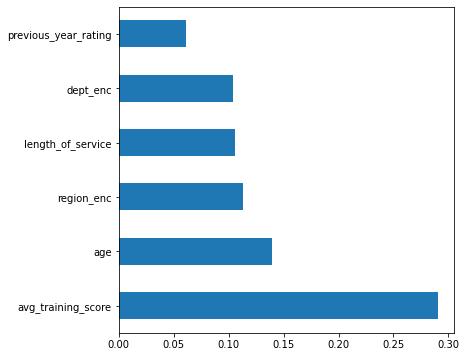

In [72]:
# Use the function to find 5 most important features
feature_importance = tree_based_feature_importance(x_train,y_train)

In [73]:
# Display the feature importance score
display(feature_importance)

,Features,Importances
6,avg_training_score,0.290256
1,age,0.139722
15,region_enc,0.113308
3,length_of_service,0.105488
14,dept_enc,0.104254
2,previous_year_rating,0.061157
4,KPIs_met >80%,0.047931
5,awards_won?,0.031852
7,"gender (1_=_m, 0_=_f)",0.025815
0,no_of_trainings,0.025249


In [74]:
# Making a list of selected features
selected_features = ['avg_training_score','age', 'region_enc',
                     'dept_enc','length_of_service', 'previous_year_rating',
                     'KPIs_met >80%', 'awards_won?', 'gender (1_=_m, 0_=_f)', 'no_of_trainings']

# Show the selected_features list
x_train[selected_features].head()

,avg_training_score,age,region_enc,dept_enc,length_of_service,previous_year_rating,KPIs_met >80%,awards_won?,"gender (1_=_m, 0_=_f)",no_of_trainings
770,86,34,0.088154,0.094779,6,2.0,0,0,1,1
5419,47,36,0.113043,0.075091,5,3.0,0,0,0,1
36583,59,32,0.114391,0.091683,7,3.0,0,0,0,1
51379,51,35,0.063492,0.058752,5,3.0,0,0,0,1
23322,49,39,0.088154,0.058752,11,3.0,0,0,1,1


In [75]:
# Creating new datasets with just the selected features
# To make the Machine Learning process becomes more effective
x_train_new = x_train[selected_features]
x_val1_new = x_val1[selected_features]
x_val2_new = x_val2[selected_features]
x_test_new = x_test[selected_features]

### Feature Scaling for Better Processing in Models

In [76]:
# Create an instance scaler
scaler = MinMaxScaler() 

# Fit the scaler to all sets and transform them
x_train_scaled = scaler.fit_transform(x_train_new)
x_val1_scaled = scaler.transform(x_val1_new)
x_val2_scaled = scaler.transform(x_val2_new)
x_test_scaled = scaler.transform(x_test_new)


x_train_scaled[:5]

array([[0.78333333, 0.35      , 0.61033868, 0.80341177, 0.13888889,
        0.4       , 0.        , 0.        , 1.        , 0.        ],
       [0.13333333, 0.4       , 0.78265985, 0.44525002, 0.11111111,
        0.6       , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.3       , 0.79199045, 0.7470918 , 0.16666667,
        0.6       , 0.        , 0.        , 0.        , 0.        ],
       [0.2       , 0.375     , 0.43958917, 0.14802191, 0.11111111,
        0.6       , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.475     , 0.61033868, 0.14802191, 0.27777778,
        0.6       , 0.        , 0.        , 1.        , 0.        ]])

# MODEL TRAINING

## 1. Logistic Regression

In [77]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [78]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['LGR - Train','LGR - Val1','LGR - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
LGR - Train 0              0.92    0.99      0.96  33497.00
            1              0.60    0.09      0.16   3182.00
            accuracy       0.92    0.92      0.92      0.92
LGR - Val1  0              0.92    0.99      0.95   7178.00
            1              0.45    0.07      0.13    682.00
            accuracy       0.91    0.91      0.91      0.91
LGR - Val2  0              0.92    0.99      0.95   7178.00
            1              0.53    0.08      0.14    682.00
            accuracy       0.91    0.91      0.91      0.91

## 2. Decision Tree

In [79]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [80]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['DT - Train','DT - Val1','DT - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
DT - Train 0              1.00    1.00      1.00  33497.00
           1              1.00    0.99      1.00   3182.00
           accuracy       1.00    1.00      1.00      1.00
DT - Val1  0              0.95    0.93      0.94   7178.00
           1              0.38    0.43      0.40    682.00
           accuracy       0.89    0.89      0.89      0.89
DT - Val2  0              0.95    0.94      0.94   7178.00
           1              0.39    0.43      0.41    682.00
           accuracy       0.89    0.89      0.89      0.89

## 3. Random Forest Classifier

In [81]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [82]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
RF - Train 0              1.00    1.00      1.00  33497.00
           1              1.00    0.99      1.00   3182.00
           accuracy       1.00    1.00      1.00      1.00
RF - Val1  0              0.93    0.99      0.96   7178.00
           1              0.75    0.27      0.40    682.00
           accuracy       0.93    0.93      0.93      0.93
RF - Val2  0              0.94    0.99      0.96   7178.00
           1              0.78    0.31      0.44    682.00
           accuracy       0.93    0.93      0.93      0.93

## 4. XGBoost Classifier

In [83]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [84]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
XGB - Train 0              0.95    1.00      0.97  33497.00
            1              0.98    0.43      0.60   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    0.99      0.97   7178.00
            1              0.85    0.33      0.47    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.88    0.37      0.52    682.00
            accuracy       0.94    0.94      0.94      0.94

## 5. KNN Classifier

In [85]:
# Fitting KNN to the Training Set
classifier = KNeighborsClassifier()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [86]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['KNN - Train','KNN - Val1','KNN - Val2']).round(2)

# Show the result
res

precision  recall  f1-score   support
KNN - Train 0              0.94    0.99      0.97  33497.00
            1              0.82    0.33      0.47   3182.00
            accuracy       0.94    0.94      0.94      0.94
KNN - Val1  0              0.93    0.98      0.95   7178.00
            1              0.52    0.19      0.27    682.00
            accuracy       0.91    0.91      0.91      0.91
KNN - Val2  0              0.93    0.99      0.96   7178.00
            1              0.63    0.23      0.33    682.00
            accuracy       0.92    0.92      0.92      0.92

From the results above, we can see that Random Forest Classifier and XGB Classifier has the best performance

So, I am going to continue this with these 2 models and I'll do Hyperparameter tuning, then choosing the best model for the final test set prediction

# HYPERPARAMETER TUNING

## 1. Random Forest Classifier

In [87]:
from pprint import pprint

# To look at the available hyperparameters, 
# Create a random forest and examine the default values
rf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [88]:
# To use RandomizedSearchCV
# Create a parameter grid to sample from during fitting

# 1. Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# 2. Number of features to consider at every split
max_features = ['auto', 'sqrt']

# 3. Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# 4. Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# 5. Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]

# 6. Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Grid Size : 2 x 12 x 2 x 4 x 4 x 10 = 7680

In [89]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=15, n_estimators=400, random_state=1)

classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [90]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
RF - Train 0              0.96    1.00      0.98  33497.00
           1              0.99    0.51      0.68   3182.00
           accuracy       0.96    0.96      0.96      0.96
RF - Val1  0              0.94    1.00      0.96   7178.00
           1              0.87    0.28      0.42    682.00
           accuracy       0.93    0.93      0.93      0.93
RF - Val2  0              0.94    1.00      0.97   7178.00
           1              0.89    0.31      0.46    682.00
           accuracy       0.94    0.94      0.94      0.94

## 2. XGB Classifier

In [91]:
# To look at the available hyperparameters for XGB
# Create an XGBClassifier and examine the default values
xgb = XGBClassifier(random_state = 42)

# Look at parameters used by the XGBoost
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


In [92]:
# Set the params of XGBoost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 9, 11 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

Grid Size : 7 x 8 x 6 x 6 x 4 = 8064

In [93]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain = classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

[10:19:51] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


In [94]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1 = classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2 = classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

# Create a table for the classification report 
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)

# Show the table
res

precision  recall  f1-score   support
XGB - Train 0              0.95    1.00      0.97  33497.00
            1              0.97    0.40      0.56   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    1.00      0.97   7178.00
            1              0.93    0.32      0.48    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.91    0.36      0.51    682.00
            accuracy       0.94    0.94      0.94      0.94

Dapat dilihat bahwa XGB Classfier berkinerja lebih baik daripada Random Forest, sehingga kami memilih XGB Classfier untuk prediksi akhir kami.

# MAKING PREDICTIONS ON TEST SET

In [95]:
# Reset the XGBClassifer Parameter to create an optimum result
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

# Fit the parameter to the data
xgb.fit(x_train_scaled, y_train)

# Use it to predict the test data
y_test_predicted = xgb.predict(x_test_scaled)

# Show the predicted test data
y_test_predicted

[10:19:54] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


array([0, 0, 0, ..., 0, 0, 1])

In [96]:
# Set the promotion rate prediction of the employee
# Based on test data
promotions_pred= pd.Series(y_test_predicted)

# Set the test dataframe shape
promotions_pred.shape

(22456,)

In [97]:
# Create the table of the value counts
promotions_pred.value_counts().to_frame()

,0
0,21727
1,729


### The model predicted that from 22456 employees tested, 
### there will be 21749 employees won't be promoted 
### and 707 employees will be promoted.

In [98]:
# Check the id of the employee
id = pd.Series(test.employee_id).reset_index().drop('index',axis=1)

In [99]:
# Creates the final result with the prediction result
result = pd.concat([id, promotions_pred], axis=1, ignore_index=True)
result.columns = ['employee_id', 'is_promoted']

In [100]:
# Show the result
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
22451,53478,0
22452,25600,0
22453,45409,0
22454,1186,0


## Final Result Table shows each employees with their promoted status if their promotional status is decided with an ML technique